In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd .read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [13]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [15]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [18]:
df['title'].nunique()

110

In [21]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.sample(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
90939,40.093271,-75.139002,WOODLAND RD & E GLENSIDE AVE; CHELTENHAM; 2016...,19095.0,Traffic: ROAD OBSTRUCTION -,2016-08-02 10:41:01,CHELTENHAM,WOODLAND RD & E GLENSIDE AVE,1,Traffic
55828,40.156215,-75.115553,BEECHWOOD RD & PATTERSON AVE; UPPER MORELAND; ...,19090.0,Fire: CARBON MONOXIDE DETECTOR,2016-05-03 17:22:00,UPPER MORELAND,BEECHWOOD RD & PATTERSON AVE,1,Fire
54024,40.088204,-75.326639,RIVER RD & 3RD ST; UPPER MERION; 2016-04-28 @ ...,19406.0,Fire: FIRE INVESTIGATION,2016-04-28 07:41:00,UPPER MERION,RIVER RD & 3RD ST,1,Fire
78080,40.259108,-75.624040,PARK DR & MASTER ST; POTTSTOWN; Station 329; ...,19464.0,EMS: HEAD INJURY,2016-06-30 14:22:00,POTTSTOWN,PARK DR & MASTER ST,1,EMS
93823,40.155283,-75.264230,PENLLYN BLUE BELL PIKE & VILLAGE CIR; WHITPAI...,19422.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-08-09 18:57:00,WHITPAIN,PENLLYN BLUE BELL PIKE & VILLAGE CIR,1,EMS


In [22]:
df.Reason.value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

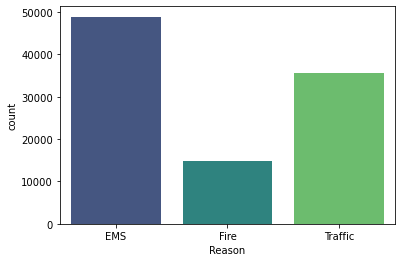

In [26]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [31]:
type(df['timeStamp'].iloc[0])

str

In [33]:
df.timeStamp = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Week Day'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.sample(7)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week Day
44155,40.073779,-75.297206,HECTOR ST & APPLE ST; CONSHOHOCKEN; 2016-04-01...,19428.0,Traffic: VEHICLE ACCIDENT -,2016-04-01 20:47:01,CONSHOHOCKEN,HECTOR ST & APPLE ST,1,Traffic,20,4,4
53745,39.989898,-75.258430,LANCASTER AVE & LANKENAU DR; LOWER MERION; 201...,19096.0,Fire: RESCUE - ELEVATOR,2016-04-27 11:12:01,LOWER MERION,LANCASTER AVE & LANKENAU DR,1,Fire,11,4,2
12731,40.172314,-75.492728,; UPPER PROVIDENCE; 2016-01-13 @ 04:44:48;,NaN,Traffic: HAZARDOUS ROAD CONDITIONS -,2016-01-13 04:47:01,UPPER PROVIDENCE,NaN,1,Traffic,4,1,2
85402,39.999715,-75.231367,BRYN MAWR AVE & HECKAMORE AVE; LOWER MERION; ...,19004.0,EMS: HEAD INJURY,2016-07-19 21:01:00,LOWER MERION,BRYN MAWR AVE & HECKAMORE AVE,1,EMS,21,7,1
96023,40.113909,-75.414713,PARKVIEW DR & WAYFIELD DR; WEST NORRITON; 2016...,19403.0,Fire: GAS-ODOR/LEAK,2016-08-15 13:47:01,WEST NORRITON,PARKVIEW DR & WAYFIELD DR,1,Fire,13,8,0
16427,40.111798,-75.343608,SCHUYLKILL AVE & DEKALB ST; NORRISTOWN; Stati...,19401.0,EMS: CVA/STROKE,2016-01-22 18:52:01,NORRISTOWN,SCHUYLKILL AVE & DEKALB ST,1,EMS,18,1,4
29248,40.204107,-75.534837,COUNTRY CLUB RD & REIFSNYDER RD; LIMERICK; 201...,19468.0,Fire: FIRE ALARM,2016-02-21 14:57:01,LIMERICK,COUNTRY CLUB RD & REIFSNYDER RD,1,Fire,14,2,6


In [37]:
df['Week Day'] = df['Week Day'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
df.sample(7)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week Day
85792,40.258919,-75.653240,MANATAWNY ST & SPRING ST; POTTSTOWN; 2016-07-2...,19464.0,Fire: FIRE SPECIAL SERVICE,2016-07-20 20:26:01,POTTSTOWN,MANATAWNY ST & SPRING ST,1,Fire,20,7,Wed
18148,40.024967,-75.282905,SCHUYLKILL EXPY & RR UNDERPASS; LOWER MERION;...,NaN,EMS: VEHICLE ACCIDENT,2016-01-24 23:22:00,LOWER MERION,SCHUYLKILL EXPY & RR UNDERPASS,1,EMS,23,1,Sun
28167,40.231609,-75.410403,SKIPPACK PIKE & CRESSMAN RD; SKIPPACK; 2016-02...,19473.0,Traffic: VEHICLE ACCIDENT -,2016-02-18 16:02:02,SKIPPACK,SKIPPACK PIKE & CRESSMAN RD,1,Traffic,16,2,Thu
70628,40.240363,-75.232598,HORSHAM RD & UPPER STATE RD; MONTGOMERY; 2016-...,19454.0,Fire: FIRE INVESTIGATION,2016-06-11 01:46:00,MONTGOMERY,HORSHAM RD & UPPER STATE RD,1,Fire,1,6,Sat
79857,40.069267,-75.333413,SCHUYLKILL EXPY & RAMP I76 WB TO BALLIGOMINGO ...,NaN,Traffic: VEHICLE ACCIDENT -,2016-07-05 17:07:00,UPPER MERION,SCHUYLKILL EXPY & RAMP I76 WB TO BALLIGOMINGO RD,1,Traffic,17,7,Tue
79308,40.340072,-75.591709,SWINEHART RD & DOUGLASS ST; DOUGLASS; Station...,NaN,EMS: CVA/STROKE,2016-07-04 01:22:00,DOUGLASS,SWINEHART RD & DOUGLASS ST,1,EMS,1,7,Mon
56098,40.259415,-75.324620,ALLENTOWN RD & FORTY FOOT RD; TOWAMENCIN; 2016...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-05-04 14:57:02,TOWAMENCIN,ALLENTOWN RD & FORTY FOOT RD,1,Traffic,14,5,Wed


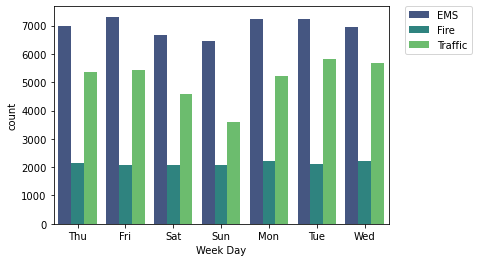

In [44]:
sns.countplot(x='Week Day', data=df, hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

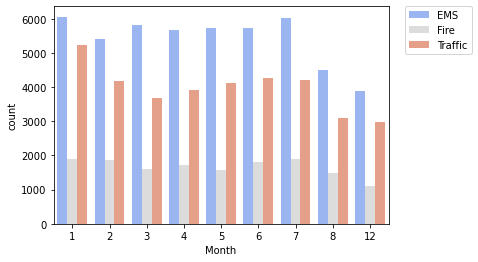

In [45]:
sns.countplot(x='Month', data=df, hue='Reason',palette='coolwarm')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [46]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Week Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

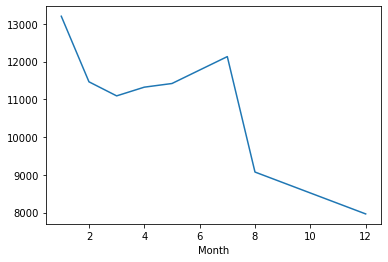

In [47]:
byMonth['twp'].plot()

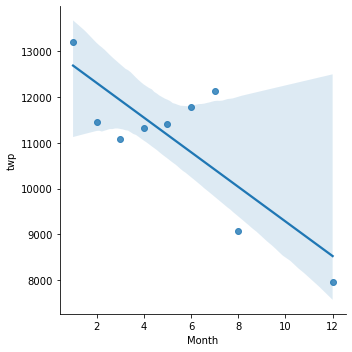

In [48]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [49]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


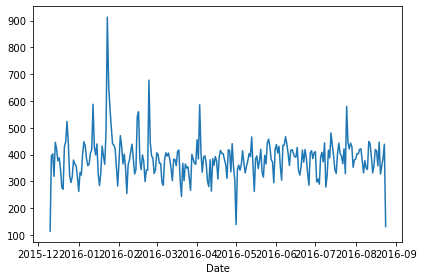

In [53]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

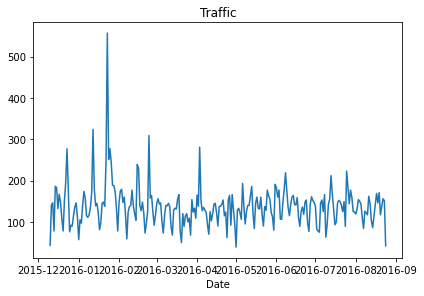

In [57]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')

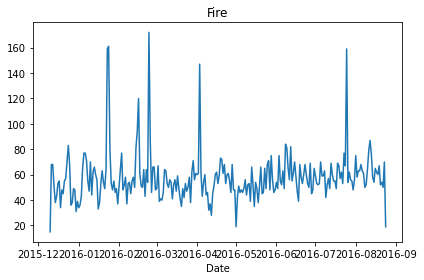

In [58]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

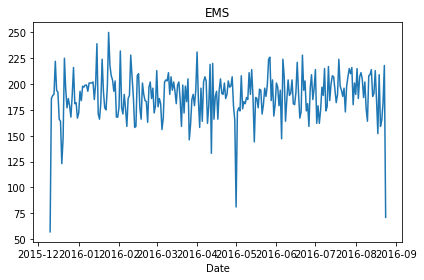

In [59]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [62]:
dayHour = df.groupby(by=['Week Day','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Week Day'>

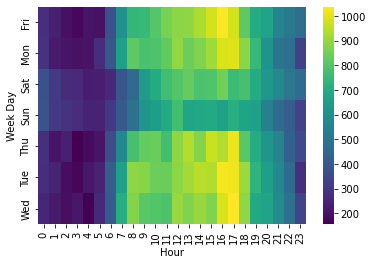

In [64]:
sns.heatmap(dayHour,cmap='viridis')

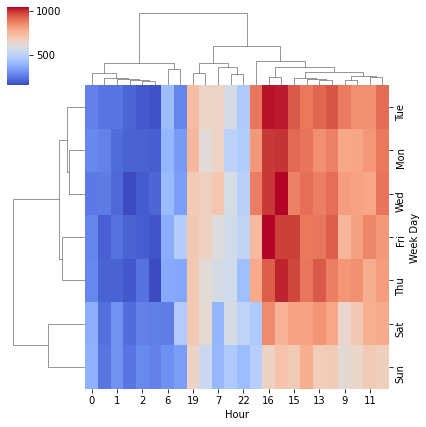

In [66]:
sns.clustermap(dayHour,cmap='coolwarm',figsize=(6,6))

In [69]:
month = df.groupby(by=['Week Day','Month']).count()['Reason'].unstack()
month

Month,1,2,3,4,5,6,7,8,12
Week Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Week Day'>

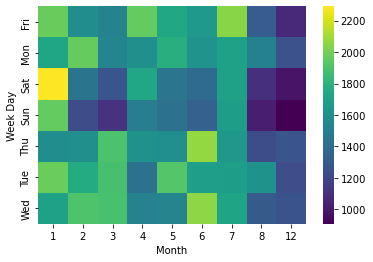

In [70]:
sns.heatmap(month,cmap='viridis')

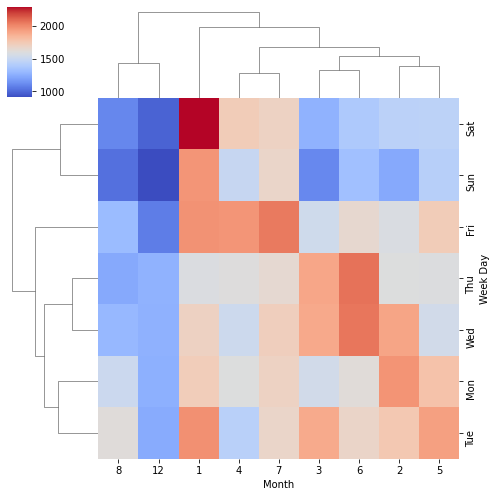

In [71]:
sns.clustermap(month,cmap='coolwarm',figsize=(7,7))